<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

from sklearn.preprocessing import Imputer

% matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [72]:
sac = pd.read_csv(sac_csv, index_col='sale_date')

In [77]:
# sac.groupby('sq__ft').count()

In [75]:
# select only sqfts that are less than 500
mask = sac['sq__ft'] < 500
# apply to sqft column
column_name = 'sq__ft'
# replace values less than 500 with the mean of columns that greater than 500
sac.loc[mask, column_name] = sac.loc[sac.loc[:,'sq__ft'] > 500,'sq__ft'].median()

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [79]:
sac.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,-0.060348,-0.095918,-0.039842,0.016949
beds,0.125319,1.000000,0.839650,0.466742,0.344752,0.038315,-0.048107
baths,0.069165,0.839650,1.000000,0.537069,0.416718,0.020946,-0.027232
sq__ft,-0.060348,0.466742,0.537069,1.000000,0.531778,0.003819,-0.005739
price,-0.095918,0.344752,0.416718,0.531778,1.000000,0.100806,-0.094262
latitude,-0.039842,0.038315,0.020946,0.003819,0.100806,1.000000,-0.998927
longitude,0.016949,-0.048107,-0.027232,-0.005739,-0.094262,-0.998927,1.000000


In [128]:
foo = sac.corr().abs().unstack() #.sort_values(ascending=False)

In [131]:
foo.head(5)

zip  zip       1.000000
     beds      0.125319
     baths     0.069165
     sq__ft    0.060348
     price     0.095918
dtype: float64

In [130]:
foo.loc['price']

zip          0.095918
beds         0.344752
baths        0.416718
sq__ft       0.531778
price        1.000000
latitude     0.100806
longitude    0.094262
dtype: float64

In [100]:
c = sac.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

topVars = pd.DataFrame(so.loc[so < 1].head(7))

In [111]:
topLabels = []
for row in topVars.index:
    for item in row:
        if item in ['latitude', 'longitude']:
            continue
        if item in topLabels:
            continue
        else:
            topLabels.append(item)

print(topLabels)

['baths', 'beds', 'sq__ft', 'price']


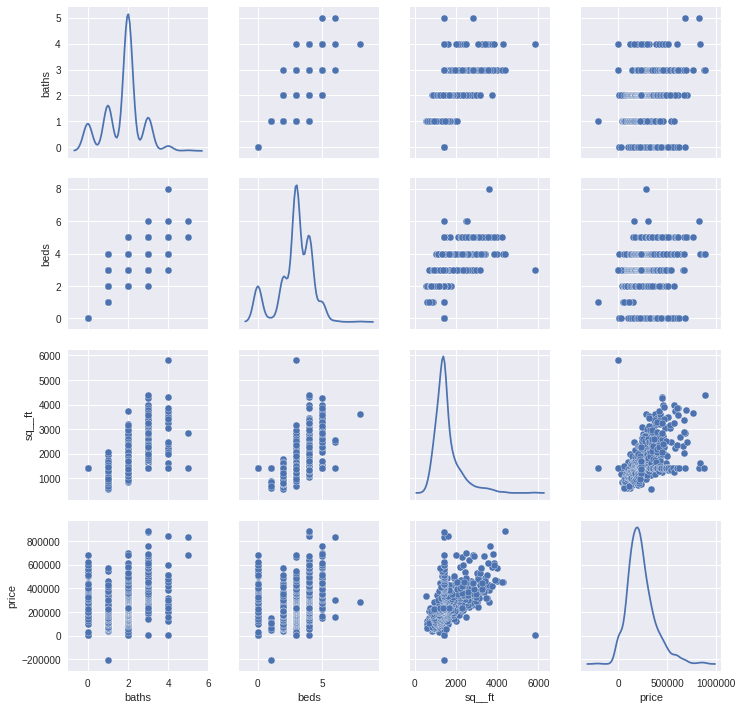

In [134]:
sns.pairplot(sac.loc[:,topLabels], diag_kind='kde')

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A:

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [6]:
# A:

### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A:

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A: